# Subset Sampling using Adaptive MCMC-MH

## Import Necessary Functions ##

In [34]:
import sys;sys.path.append("../../../")
import numpy as np
from scipy.stats import multivariate_normal as mvn
from scipy.stats import norm
import matplotlib.pyplot as plt

from mcmcpy.subset_simulation.subset_simulation import SubsetSimulation
from mcmcpy.proposals.normal import Normal, AdaptiveNormal

# Using MCMC-MH #

## Initialize density, proposal, performance function, number of chains and number of samples (determines target conditional probability) ##

In [35]:

density = mvn(mean=np.zeros(2), cov=np.eye(2))
performance_function = lambda X: 4*np.sqrt(2) - X[:,0] - X[:,1]
proposal = Normal(cov=np.eye(2))
number_of_chains = 1000
number_of_samples = 10000

SubsetSimulator = SubsetSimulation(density,
                                   proposal,
                                   performance_function,
                                   number_of_chains,
                                   number_of_samples)
failure_probability, initial_samples, retained_samples = SubsetSimulator()
reliability_index = -norm().ppf(failure_probability)
print(f"Estimated Failure Probability = {failure_probability}")
print(f"Reliability Index = {reliability_index}")

Estimated Failure Probability = 3.742727272727273e-05
Reliability Index = 3.9603035679072134


## Visualization Accepted Samples and the Failure Domains ##

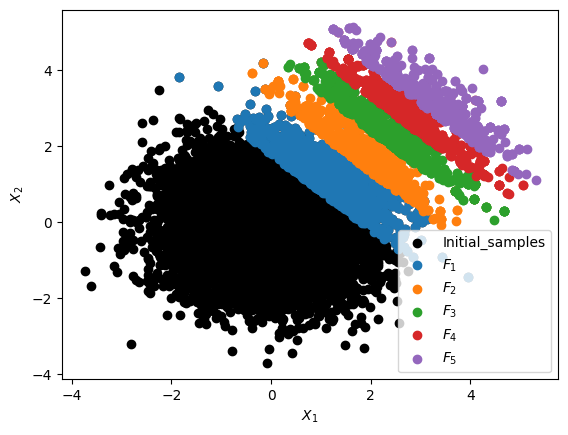

In [36]:
fig, ax  = plt.subplots()
ax.scatter(initial_samples[:,0],
           initial_samples[:,1],
           color="k",
           label="Initial_samples")
tags = [
        r"$F_{1}$",
        r"$F_{2}$",
        r"$F_{3}$",
        r"$F_{4}$",
        r"$F_{5}$",
        r"$F_{6}$",
        r"$F_{7}$",
        r"$F_{8}$",
        r"$F_{9}$",
        r"$F_{10}$"
        ]
for i in range(len(retained_samples)):
    ax.scatter(retained_samples[i][:,0],
               retained_samples[i][:,1],
               label=tags[i])
ax.set_xlabel(r"$X_{1}$")
ax.set_ylabel(r"$X_{2}$")
ax.legend()
plt.show()

# Using MCMC-MH with Adaptive Proposal #

## Initialize density, proposal, performance function, number of chains and number of samples (determines target conditional probability) ##

In [37]:
proposal = AdaptiveNormal(cov=np.eye(2))

SubsetSimulator = SubsetSimulation(density,
                                   proposal,
                                   performance_function,
                                   number_of_chains,
                                   number_of_samples)
failure_probability, initial_samples, retained_samples = SubsetSimulator()
reliability_index = -norm().ppf(failure_probability)
print(f"Estimated Failure Probability = {failure_probability}")
print(f"Reliability Index = {reliability_index}")

Estimated Failure Probability = 1.4481818181818185e-05
Reliability Index = 4.181465374485492


## Visualization Accepted Samples and the Failure Domains ##

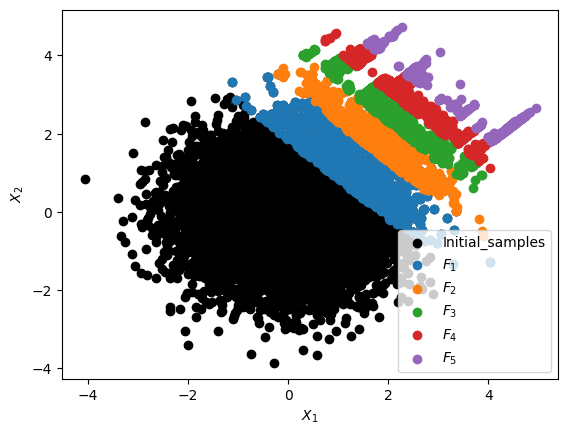

In [38]:
fig, ax  = plt.subplots()
ax.scatter(initial_samples[:,0],
           initial_samples[:,1],
           color="k",
           label="Initial_samples")
tags = [
        r"$F_{1}$",
        r"$F_{2}$",
        r"$F_{3}$",
        r"$F_{4}$",
        r"$F_{5}$",
        r"$F_{6}$",
        r"$F_{7}$",
        r"$F_{8}$",
        r"$F_{9}$",
        r"$F_{10}$"
        ]
for i in range(len(retained_samples)):
    ax.scatter(retained_samples[i][:,0],
               retained_samples[i][:,1],
               label=tags[i])
ax.set_xlabel(r"$X_{1}$")
ax.set_ylabel(r"$X_{2}$")
ax.legend()
plt.show()